In [23]:
import numpy as np

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [21]:
import seaborn as sns

### Загрузка данных

In [5]:
df = pd.read_csv('export-reestrmkd-16-20241201.csv', delimiter=';', low_memory=False)

In [6]:
df.shape

(19775, 60)

In [7]:
df.columns

Index(['id', 'region_id', 'area_id', 'city_id', 'street_id',
       'shortname_region', 'formalname_region', 'shortname_area',
       'formalname_area', 'shortname_city', 'formalname_city',
       'shortname_street', 'formalname_street', 'house_number', 'building',
       'block', 'letter', 'address', 'houseguid', 'management_organization_id',
       'built_year', 'exploitation_start_year', 'project_type', 'house_type',
       'is_alarm', 'method_of_forming_overhaul_fund', 'floor_count_max',
       'floor_count_min', 'entrance_count', 'elevators_count',
       'energy_efficiency', 'quarters_count', 'living_quarters_count',
       'unliving_quarters_count', 'area_total', 'area_residential',
       'area_non_residential', 'area_common_property', 'area_land',
       'parking_square', 'playground', 'sportsground', 'other_beautification',
       'foundation_type', 'floor_type', 'wall_material', 'basement_area',
       'chute_type', 'chute_count', 'electrical_type',
       'electrical_entrie

### Распределение домов по городам

In [ ]:
df.formalname_city.value_counts()

,count
formalname_city,
Казань,6194
Набережные Челны,1503
Альметьевск,969
Чистополь,927
Нижнекамск,904
...,...
Улисьял,1
Калинино,1
Атабаево,1


In [ ]:
df.formalname_city.isna().sum()

15

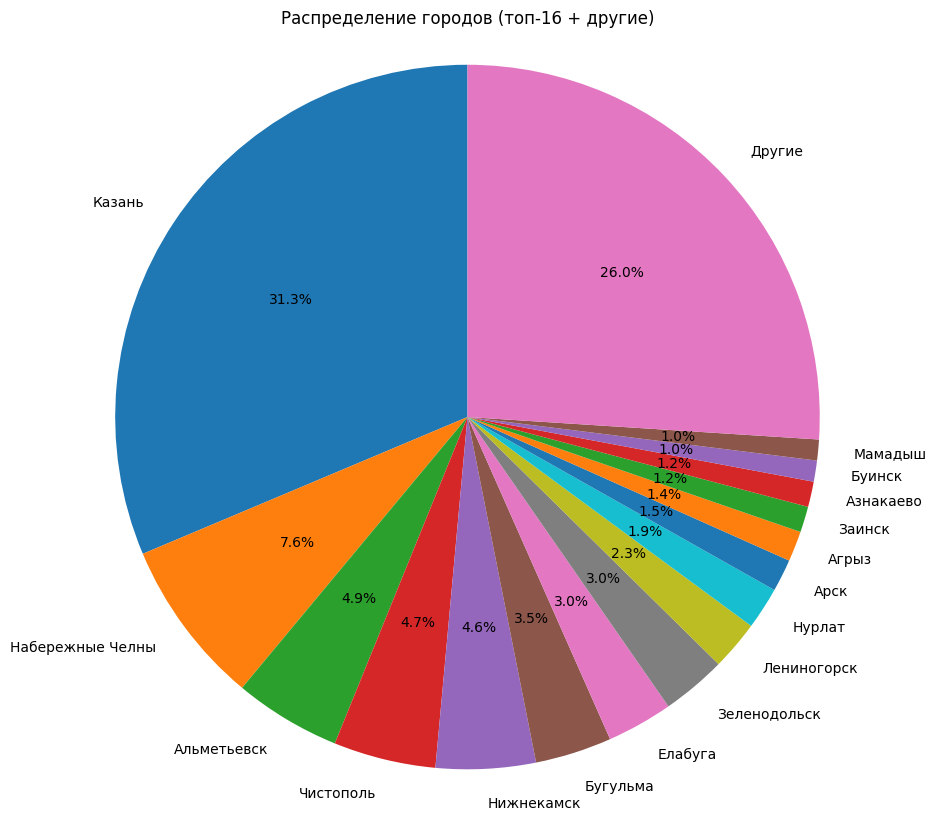

In [ ]:
city_counts = df.formalname_city.value_counts()
top_16_cities = city_counts.head(16)
other_cities_sum = city_counts[16:].sum()
top_16_cities['Другие'] = other_cities_sum

plt.figure(figsize=(10, 10))
plt.pie(top_16_cities, labels=top_16_cities.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение городов (топ-16 + другие)')
plt.axis('equal')
plt.show()

### Разбор домов Казани

In [8]:
df_kazan = df[df.formalname_city == 'Казань']

#### Тип проекта

In [ ]:
df_kazan.project_type.value_counts()

,count
project_type,
индивид.,1396
1-447 С-40,719
1-511,384
468С,257
121,192
...,...
1-467 А-18,1
1-467Д-19,1
Э-0931/1.5,1


In [ ]:
df_kazan.project_type.isna().sum()

797

#### Тип дома

In [ ]:
df_kazan.house_type.value_counts()

,count
house_type,
Многоквартирный дом,5696
Не заполнено,314
Жилой дом блокированной застройки,144
Специализированный жилищный фонд,32
Жилой дом (индивидуально-определенное здание),8


In [ ]:
df_kazan.house_type.isna().sum()

0

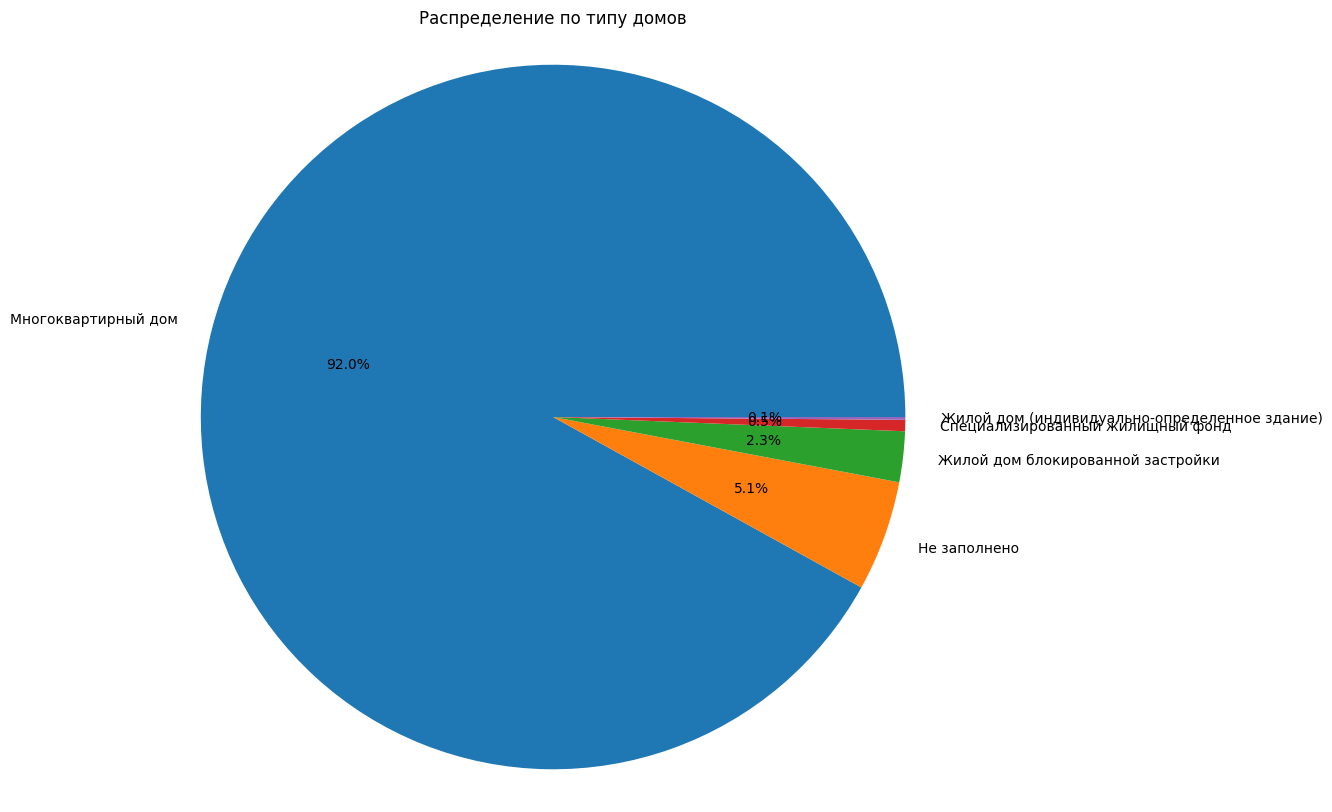

In [ ]:
house_type_counts = df_kazan.house_type.value_counts()

plt.figure(figsize=(10, 10))
plt.pie(house_type_counts, labels=house_type_counts.index, autopct='%1.1f%%')
plt.title('Распределение по типу домов')
plt.axis('equal')
plt.show()

#### Факт признания дома аварийным

In [ ]:
df_kazan.is_alarm.value_counts()

,count
is_alarm,
Нет,6017
Да,177


In [ ]:
df_kazan.is_alarm.isna().sum()

0

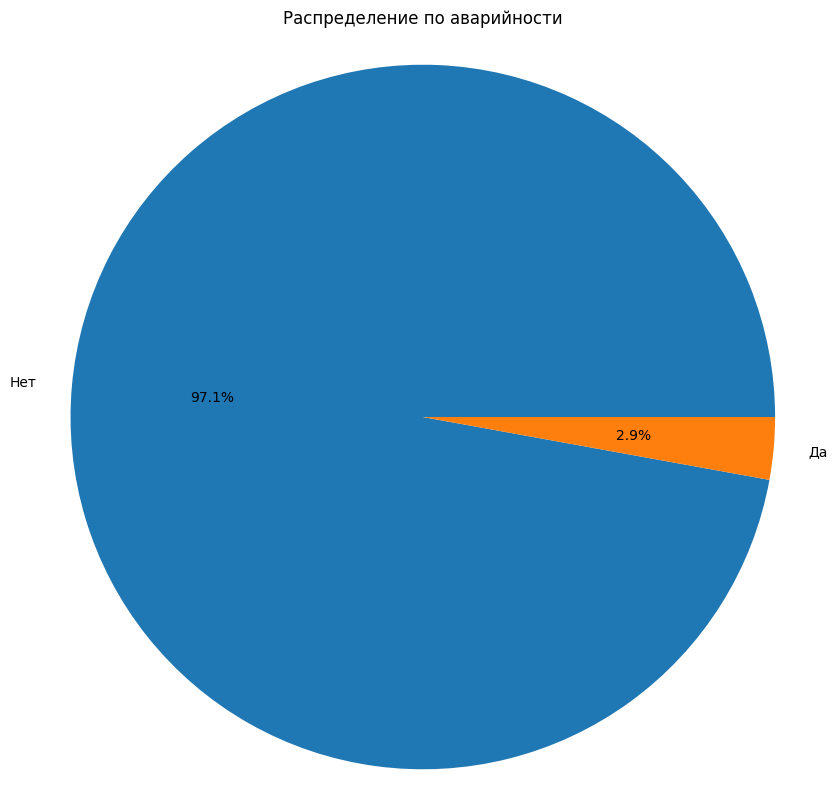

In [ ]:
alarm_counts = df_kazan.is_alarm.value_counts()

plt.figure(figsize=(10, 10))
plt.pie(alarm_counts, labels=alarm_counts.index, autopct='%1.1f%%')
plt.title('Распределение по аварийности')
plt.axis('equal')
plt.show()

#### Количество этажей

In [9]:
df_kazan[['floor_count_min', 'floor_count_max']].isna().sum()

,0
floor_count_min,863
floor_count_max,336


In [10]:
df_kazan[['floor_count_min', 'floor_count_max']].isna().value_counts()

floor_count_min  floor_count_max
False            False              5331
True             False               527
                 True                336
Name: count, dtype: int64

In [11]:
df_kazan[['floor_count_min', 'floor_count_max']].describe()

,floor_count_min,floor_count_max
count,5331.000000,5858.000000
mean,6.424873,6.465005
std,3.683202,3.906656
min,0.000000,0.000000
25%,5.000000,4.000000
50%,5.000000,5.000000
75%,9.000000,9.000000
max,37.000000,40.000000


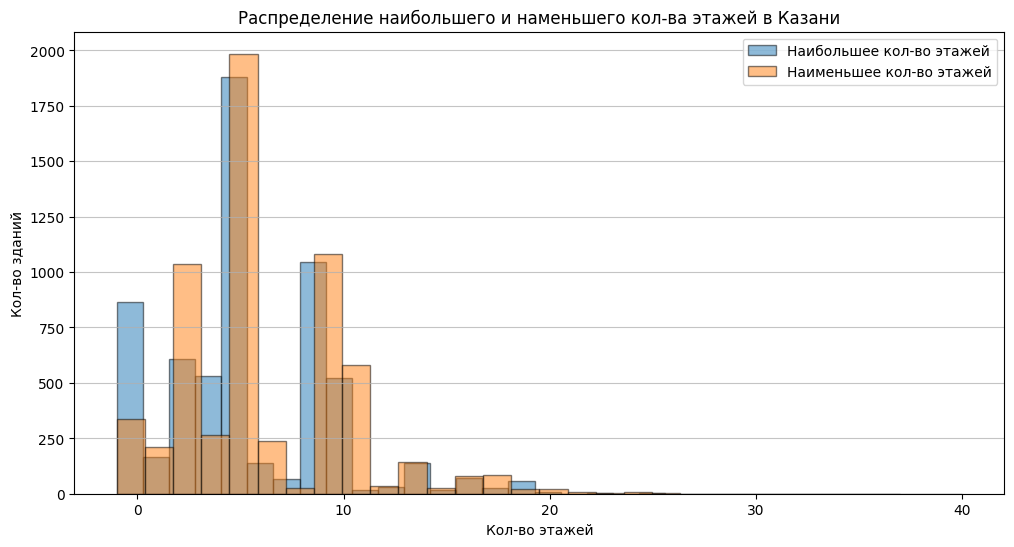

In [15]:
plt.figure(figsize=(12, 6))

filled_floor_count = df_kazan[['floor_count_min', 'floor_count_max']].fillna(-1)

plt.hist(filled_floor_count['floor_count_min'], bins=30, alpha=0.5, label='Наибольшее кол-во этажей', edgecolor='black')
plt.hist(filled_floor_count['floor_count_max'], bins=30, alpha=0.5, label='Наименьшее кол-во этажей', edgecolor='black')

plt.title('Распределение наибольшего и наменьшего кол-ва этажей в Казани')

plt.xlabel('Кол-во этажей')
plt.ylabel('Кол-во зданий')

plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.75)
plt.show()

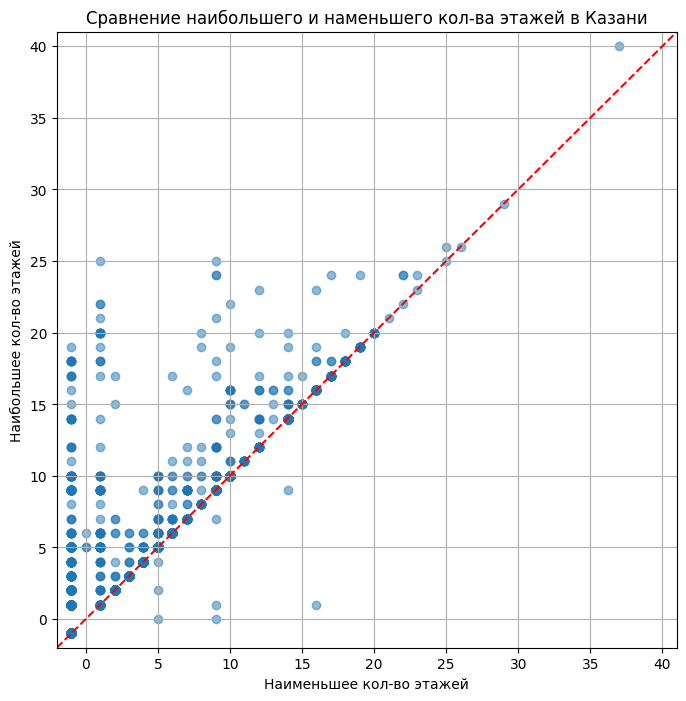

In [16]:
plt.figure(figsize=(8, 8))
plt.scatter(filled_floor_count['floor_count_min'],
            filled_floor_count['floor_count_max'], alpha=0.5)
plt.xlabel('Наименьшее кол-во этажей')
plt.ylabel('Наибольшее кол-во этажей')
plt.title('Сравнение наибольшего и наменьшего кол-ва этажей в Казани')

plt.plot([-2, 41], [-2, 41], color='red', linestyle='--')

plt.xlim(-2,41)
plt.ylim(-2,41)

plt.grid(True)
plt.show()

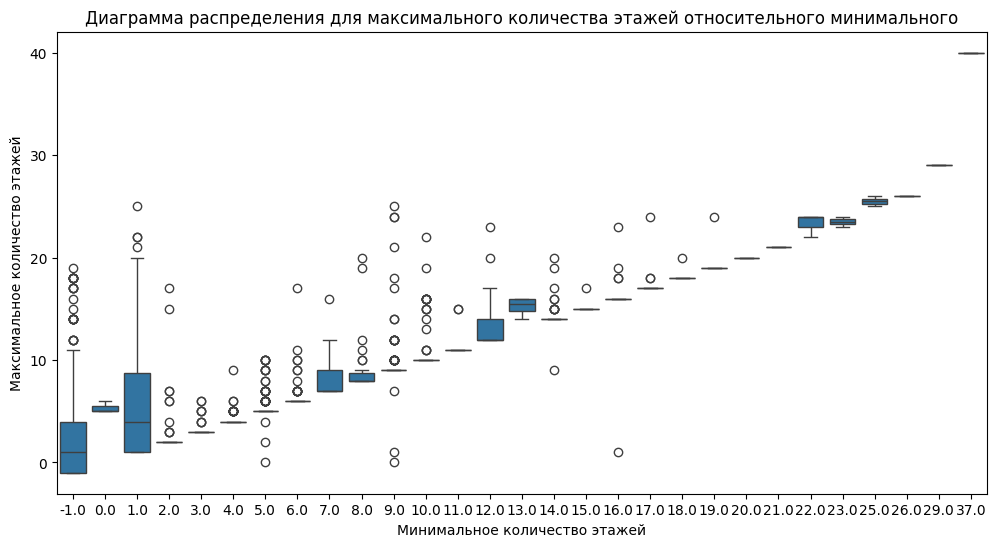

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='floor_count_min', y='floor_count_max', data=filled_floor_count)
plt.title('Диаграмма распределения для максимального количества этажей относительного минимального')
plt.xlabel('Минимальное количество этажей')
plt.ylabel('Максимальное количество этажей')
plt.show()

#### living_quarters_count

In [32]:
print(df_kazan['living_quarters_count'].describe())

count    5331.000000
mean       87.935472
std        75.061983
min         0.000000
25%        36.000000
50%        78.000000
75%       117.000000
max      1026.000000
Name: living_quarters_count, dtype: float64


In [33]:
print(df_kazan['living_quarters_count'].isna().sum())

863


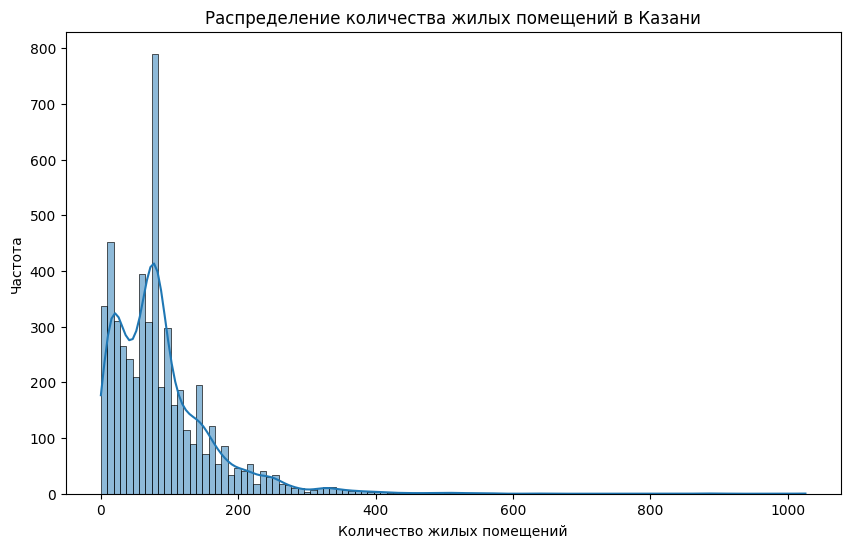

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(df_kazan['living_quarters_count'].dropna(), kde=True)
plt.title('Распределение количества жилых помещений в Казани')
plt.xlabel('Количество жилых помещений')
plt.ylabel('Частота')
plt.show()

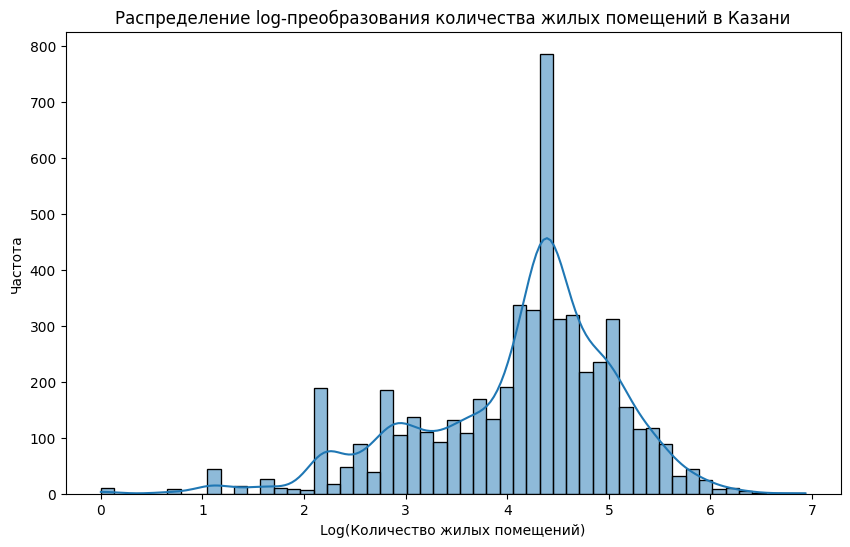

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df_kazan['living_quarters_count'].dropna()), kde=True)
plt.title('Распределение log-преобразования количества жилых помещений в Казани')
plt.xlabel('Log(Количество жилых помещений)')
plt.ylabel('Частота')
plt.show()

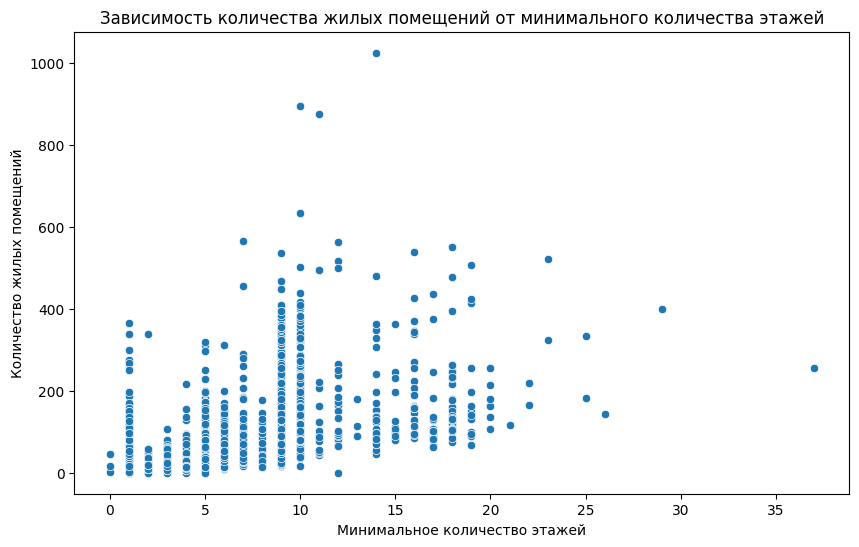

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='floor_count_min', y='living_quarters_count', data=df_kazan)
plt.title('Зависимость количества жилых помещений от минимального количества этажей')
plt.xlabel('Минимальное количество этажей')
plt.ylabel('Количество жилых помещений')
plt.show()
